In [77]:
import auxiliary, models, constants
import numpy as np
from maneuvers import Maneuvers

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## From small orbit to big orbit

In [178]:
coe,date = auxiliary.parseTle("suchai0.tle")
coe[2] = 1*np.pi/180
#----- SPACECRAFT DEFINITIONS -----
satellite = models.Spacecraft(3,1,10)
satellite.thruster = models.Thruster(thrust=50e-3,isp=3200)

maneuver = Maneuvers(coe,satellite,date)

maneuver.propagate(60*60*24*3,60)

maneuver.addPerturbation("thrust")
targetCoe = np.array(maneuver.history.coe[-1,:])
targetCoe[0] = 13000e3
targetCoe[1] = 0.5
targetCoe[2] = 45*np.pi/180
#targetCoe[3] = 300*np.pi/180
#targetCoe[4] = 300*np.pi/180
maneuver.setTargetRun(targetCoe)
maneuver.propagate(60*60*24*4.65,60)
maneuver.removePerturbation("thrust")

maneuver.propagate(60*60*24*2,60)

Propagating...from day  0.0  to  3.0
Propagating...from day  3.0  to  7.6499999999999995
Propagating...from day  7.6499999999999995  to  9.65


------------MANEUVER REPORT-------------
----INITIAL CONDITIONS----
Spacecraft:
  Wet Mass: 		3 kg
  Dry Mass: 		1 kg
  Propellant Mass: 	2 kg
  Area: 		10 m2
  Cd: 			2.2
Orbit:
  Semi-major axis (a): 		6879.844551132894 km
  Eccentricity (e): 		0.001054
  Inclination (i): 		1.0 deg
  Argument of Perigee (omega): 	248.5815 deg
  RAAN (Omega): 		235.4612 deg
  True Anomaly (nu): 		110.95639 deg

----STAGE 1----
Spacecraft:
  Propellant Mass: 	2.0 kg
Orbit:
  Semi-major axis (a): 		6879.844551132894 km
  Eccentricity (e): 		0.001054
  Inclination (i): 		1.0 deg
  Argument of Perigee (omega): 	248.5815 deg
  RAAN (Omega): 		235.4612 deg
  True Anomaly (nu): 		333.30788 deg

----STAGE 2----
Spacecraft:
  Propellant Mass: 	1.3598307158882477 kg
Orbit:
  Semi-major axis (a): 		12999.675860610256 km
  Eccentricity (e): 		0.499953
  Inclination (i): 		43.83276983351686 deg
  Argument of Perigee (omega): 	311.19751 deg
  RAAN (Omega): 		207.36177 deg
  True Anomaly (nu): 		184.8881 deg

----FI

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

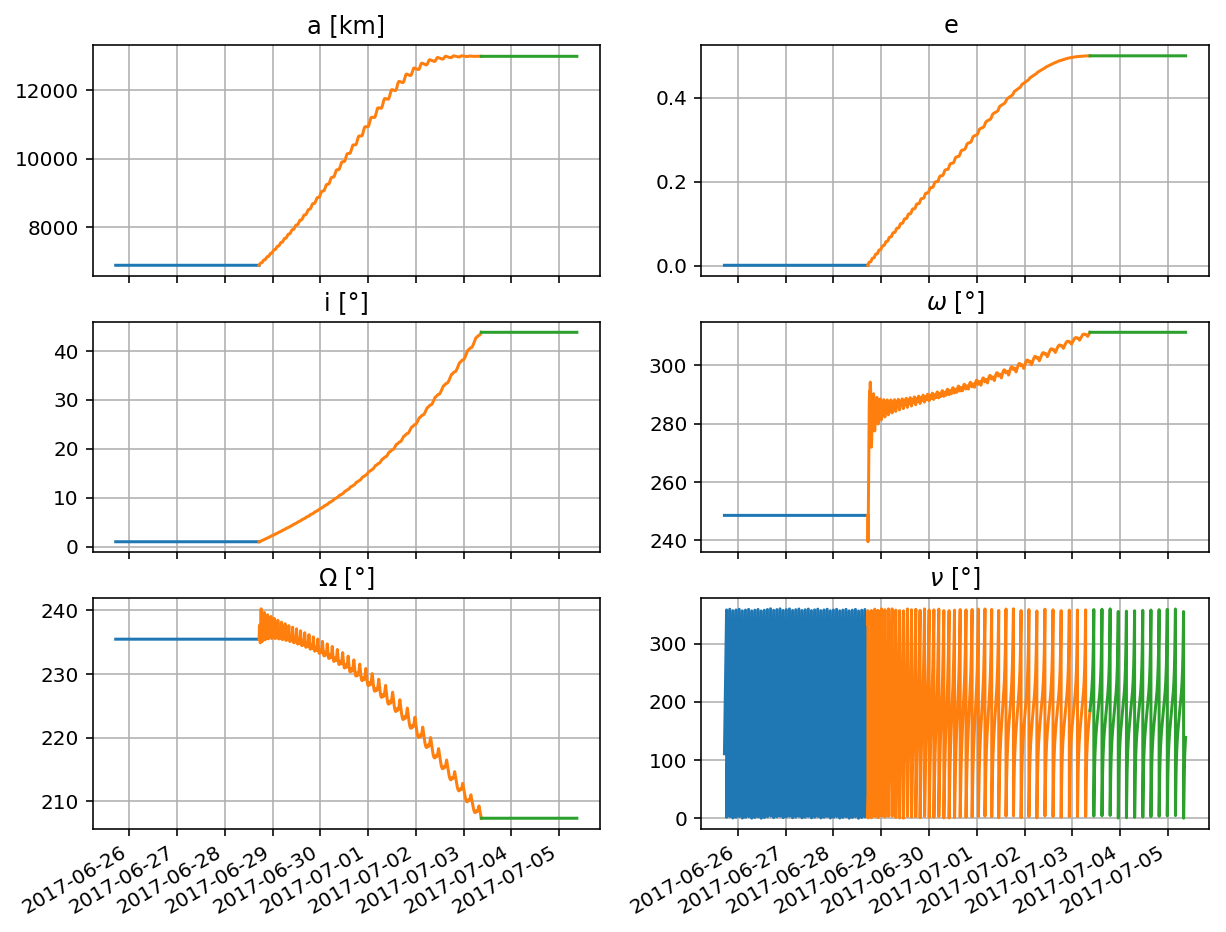

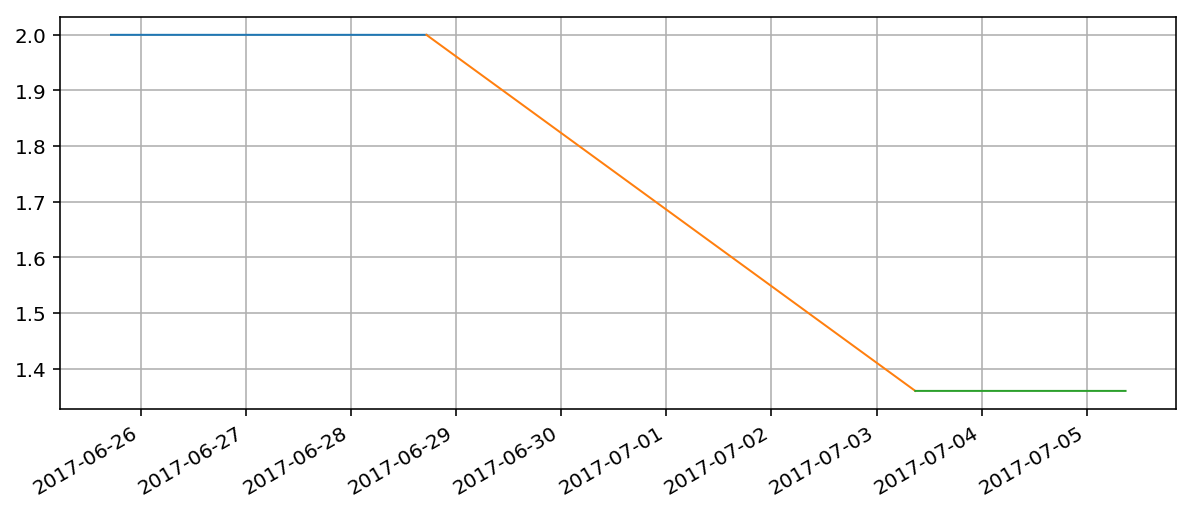

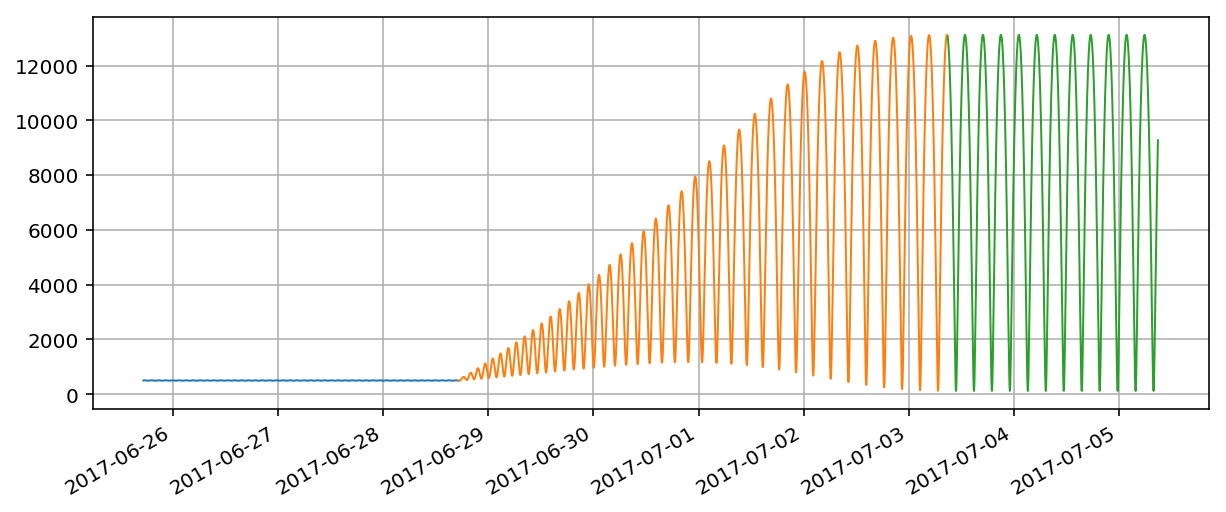

In [179]:
maneuver.makeReport();
display(maneuver.ipvPlot3D());
maneuver.plot("coe");
maneuver.plot("singleItem",maneuver.history.propMass);
maneuver.plot("singleItem",np.linalg.norm(maneuver.history.r,axis=1)/1000-constants.Re/1000);

## From big orbit to small orbit (reverse)

In [241]:
targetCoe,date = auxiliary.parseTle("suchai0.tle")
targetCoe[2] = 1*np.pi/180

coe = np.array(targetCoe)
coe[0] = 13000e3
coe[1] = 0.5
coe[2] = 45*np.pi/180
#coe[3] = 300*np.pi/180
#coe[4] = 300*np.pi/180

print("COE: ",coe)
print("Target coe: ",targetCoe)

#----- SPACECRAFT DEFINITIONS -----
satellite = models.Spacecraft(3,1,10)
satellite.thruster = models.Thruster(thrust=50e-3,isp=3200)

maneuver = Maneuvers(coe,satellite,date)

maneuver.propagate(60*60*24*3,60)

maneuver.addPerturbation("thrust")
maneuver.setTargetRun(targetCoe)
maneuver.propagate(60*60*24*5.59,60)
maneuver.removePerturbation("thrust")

maneuver.propagate(60*60*24*2,60)

COE:  [1.30000000e+07 5.00000000e-01 7.85398163e-01 4.33856563e+00
 4.10957320e+00 1.93655433e+00]
Target coe:  [6879844.551132894, 0.0010537, 0.017453292519943295, 4.338565634546284, 4.109573200696873, 1.9365543269347247]
Propagating...from day  0.0  to  3.0
Propagating...from day  3.0  to  8.59
Propagating...from day  8.59  to  10.59


------------MANEUVER REPORT-------------
----INITIAL CONDITIONS----
Spacecraft:
  Wet Mass: 		3 kg
  Dry Mass: 		1 kg
  Propellant Mass: 	2 kg
  Area: 		10 m2
  Cd: 			2.2
Orbit:
  Semi-major axis (a): 		13000.0 km
  Eccentricity (e): 		0.5
  Inclination (i): 		45.0 deg
  Argument of Perigee (omega): 	248.5815 deg
  RAAN (Omega): 		235.4612 deg
  True Anomaly (nu): 		110.95639 deg

----STAGE 1----
Spacecraft:
  Propellant Mass: 	2.0 kg
Orbit:
  Semi-major axis (a): 		13000.0 km
  Eccentricity (e): 		0.5
  Inclination (i): 		45.0 deg
  Argument of Perigee (omega): 	248.5815 deg
  RAAN (Omega): 		235.4612 deg
  True Anomaly (nu): 		211.34904 deg

----STAGE 2----
Spacecraft:
  Propellant Mass: 	1.2304201509279873 kg
Orbit:
  Semi-major axis (a): 		6879.845538171352 km
  Eccentricity (e): 		0.001054
  Inclination (i): 		1.106199868416627 deg
  Argument of Perigee (omega): 	260.53632 deg
  RAAN (Omega): 		230.72598 deg
  True Anomaly (nu): 		175.15367 deg

----FINAL CONDITIONS----
Spacecraf

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

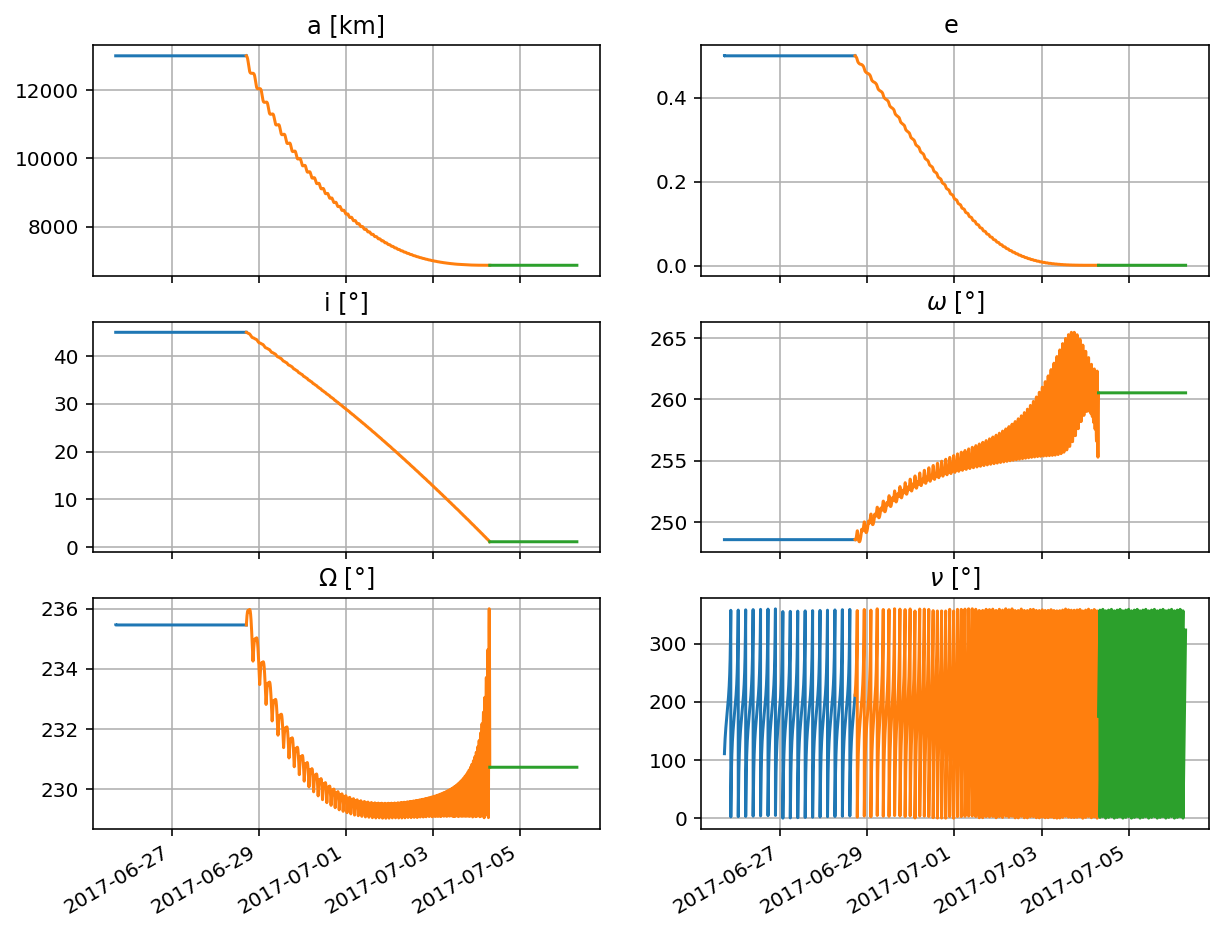

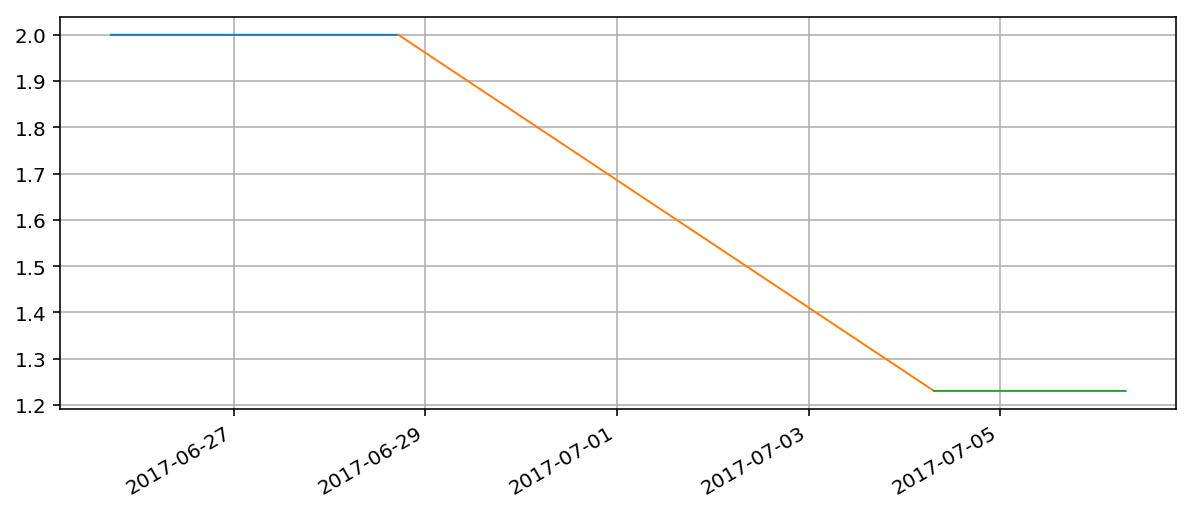

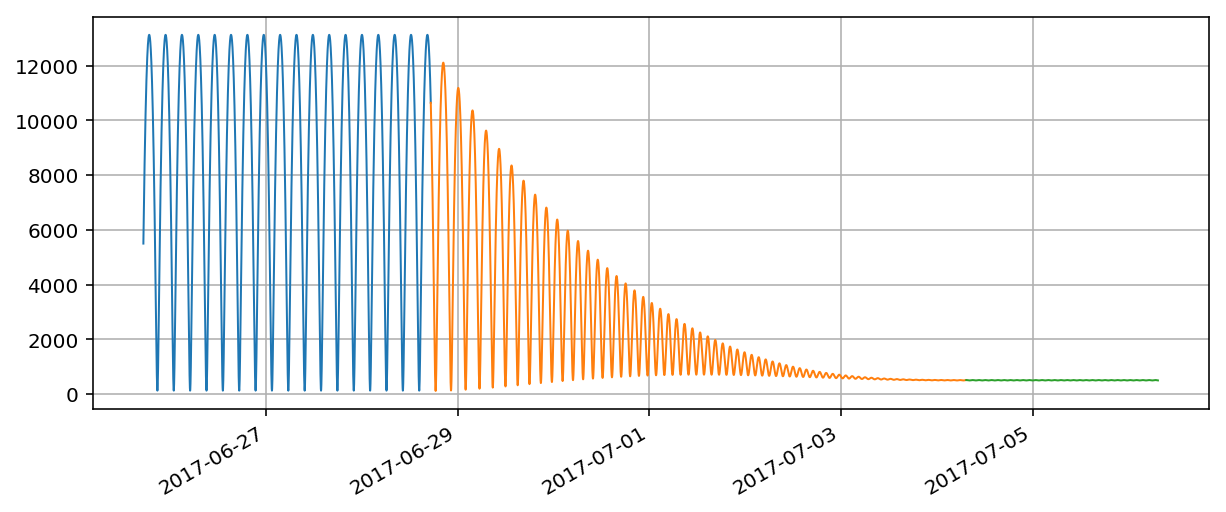

In [242]:
maneuver.makeReport();
display(maneuver.ipvPlot3D());
maneuver.plot("coe");
maneuver.plot("singleItem",maneuver.history.propMass);
maneuver.plot("singleItem",np.linalg.norm(maneuver.history.r,axis=1)/1000-constants.Re/1000);